In [106]:
import cv2 as cv
import imutils
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

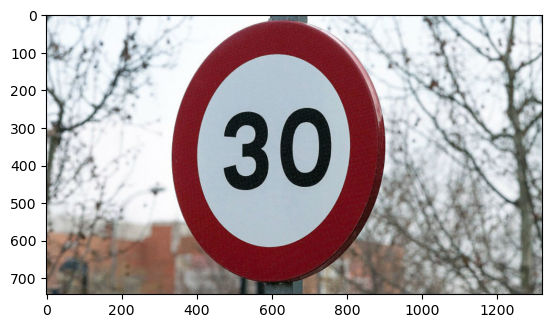

In [107]:
img = cv.imread('st30.jpg',cv.IMREAD_COLOR)

plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

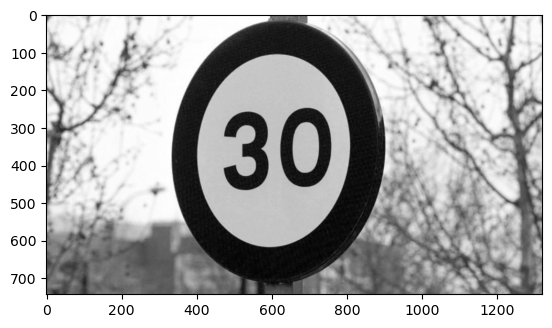

In [108]:
gray = cv.split(img)[1] 
gray = cv.blur(gray, (3,3)) #Hace falta para mitigar el ruido

plt.imshow(gray, cmap = 'gray')

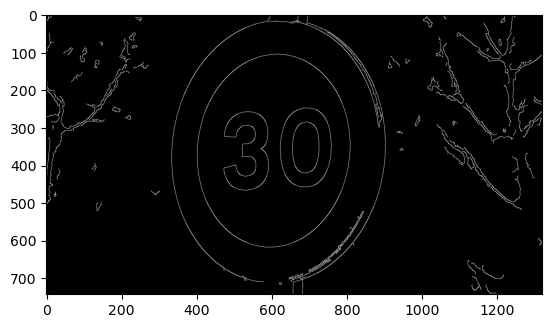

In [109]:
edged = cv.Canny(gray, 30, 200) 

plt.imshow(edged, cmap = 'gray')

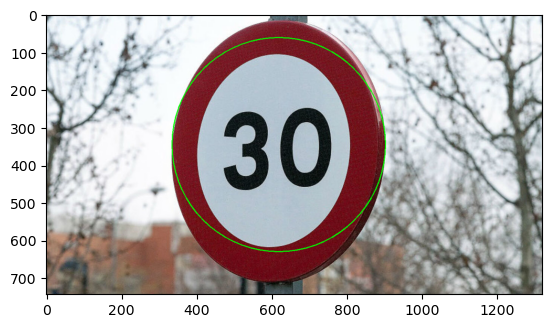

In [110]:
minDist = 100
param1 = 30 #500
param2 = 110 #200 
minRadius = 200
maxRadius = int(edged.shape[0]/2) #10

circles = cv.HoughCircles(edged, cv.HOUGH_GRADIENT, dp=1.5, minDist=minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
circles = np.uint16(np.around(circles))

img_with_circles = img.copy()

for c in circles[0,:]:
    a, b, r = c[0], c[1], c[2]
    cv.circle(img_with_circles, (a, b), r, (0, 255, 0), 2)

plt.imshow(cv.cvtColor(img_with_circles,cv.COLOR_BGR2RGB))

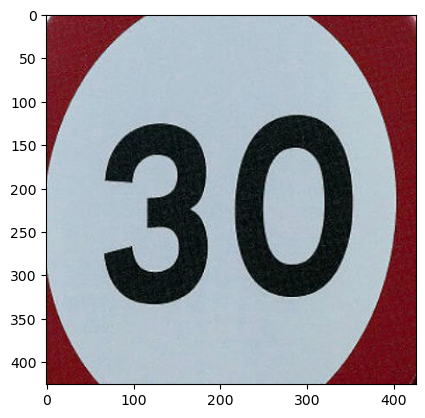

In [111]:
a = circles[0][0][0]
b = circles[0][0][1]
r = circles[0][0][2]
r = int(r-r/4)

cropped = img[b-r:b+r, a-r:a+r]

plt.imshow(cv.cvtColor(cropped,cv.COLOR_BGR2RGB))

In [112]:
text = pytesseract.image_to_string(cropped, config='--psm 11')
print("La velocidad limite es " + text)

La velocidad limite es 30

